<class 'pandas.core.series.Series'>
Month
1901-01-01    266.0
1902-01-01    145.9
1903-01-01    183.1
1904-01-01    119.3
1905-01-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


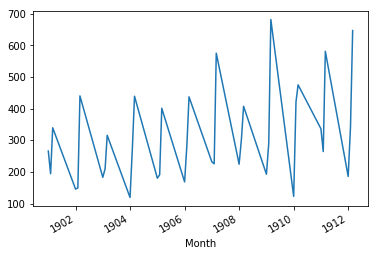

C:\Users\Monica\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


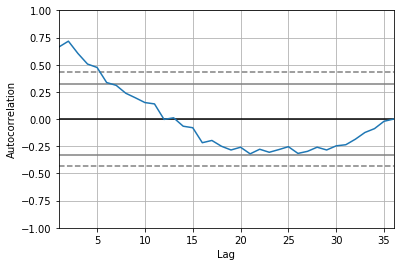

C:\Users\Monica\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Monica\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Monica\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=349.117716, expected=342.300000
predicted=306.512991, expected=339.700000
predicted=387.376422, expected=440.400000
predicted=348.154224, expected=315.900000
predicted=386.308838, expected=439.300000
predicted=356.082037, expected=401.300000
predicted=446.379565, expected=437.400000
predicted=394.737330, expected=575.500000
predicted=434.915584, expected=407.600000
predicted=507.923425, expected=682.000000
predicted=435.482971, expected=475.300000
predicted=652.743782, expected=581.300000
predicted=546.343453, expected=646.900000
Test MSE: 6958.325


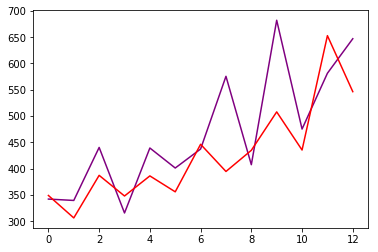

In [51]:
from pandas import read_csv
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from dateutil.parser import parse
from pandas.tools.plotting import autocorrelation_plot

def parser(x):
    x = x.lstrip('0')
    if(len(x) == 6):        
        x = '19' + x
    else:
        x = '190' + x
    x = pd.to_datetime(x, infer_datetime_format=True)
    #return datetime.strptime('190'+x, '%Y-%b')
    return x
    

series = pd.read_csv('sales-shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

print(type(series))
print(series.head())

#display trend of values
series.plot()
pyplot.show()

autocorrelation_plot(series)
pyplot.show()

'''
#Create and fit arima model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())
'''

X = series.values
#Splitting data into train and test
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

#Predicting for each element of the test set and adding the predicted values back as input to the model. 
#A new model is generated after each new observation is added back in.
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test, color = 'purple')
pyplot.plot(predictions, color='red')
pyplot.show()